# Fashion MNIST Classification with RNNs

To start off, the Fashion-MNIST clothing is a popular dataset used in the deep learning industry which contains 70k grayscale images that fall into 10 different categories. It's relatively simple and can be used as a basis for learning and practicing how to develop, solve, and use CNN for identifiying images. We can classify the fashion MNIST dataset using LSTM RNNs. 

To note, LSTM architecture is divided into three areas: input, cell state, and output. 
Starting with input, it protects the cell state contents from possible alterations that are irrelevant to the context inputs. So to summarize, we will load the raw dataset into memory. There 10 categories and it's divded between 70k images, so there is bound to have some redundancy in it. So the best approach is to load and filter each category into set groups and train or test the datasets. We also need to hot encode class integers so that the data may fit a neural network multi-class classification model like LSTM. 

In cell state, we will use two indices to unfold sequence index t and the other for the cell index i. Index i is used to allow the current cell at step t to use or forget inputs and hidden states from other cells. We will take the loaded data, where one sample of data equals one window of the time series data. Each window has 255 time steps, and a time step has ten categories it could go into. The output for the model would result into a six-element vector containing the probability of a given window belonging to each of the six activity types. The model will also have a single hidden layer and a dropout layer to reduce possible overfitting with training data. Lastly, a densely conttected layer is used to interpret the features extracted by the LSTM hidden layer before making predictions with one more last layer. 


Output gate protects the following cells afterwards from unnesscary alterations that don't relate to the context cell state. It also decides what the next hidden state should be. So once the model is fit, it's evaluated on the test dataset and the accuaracy of the fit model on the test dataset is returned. Repeating the evaluation of the model multiple times, we can summarize the performance across the multiple runs. We can also report the mean and standard deviation of the performance to understand the average accuracy of the model on the dataset.

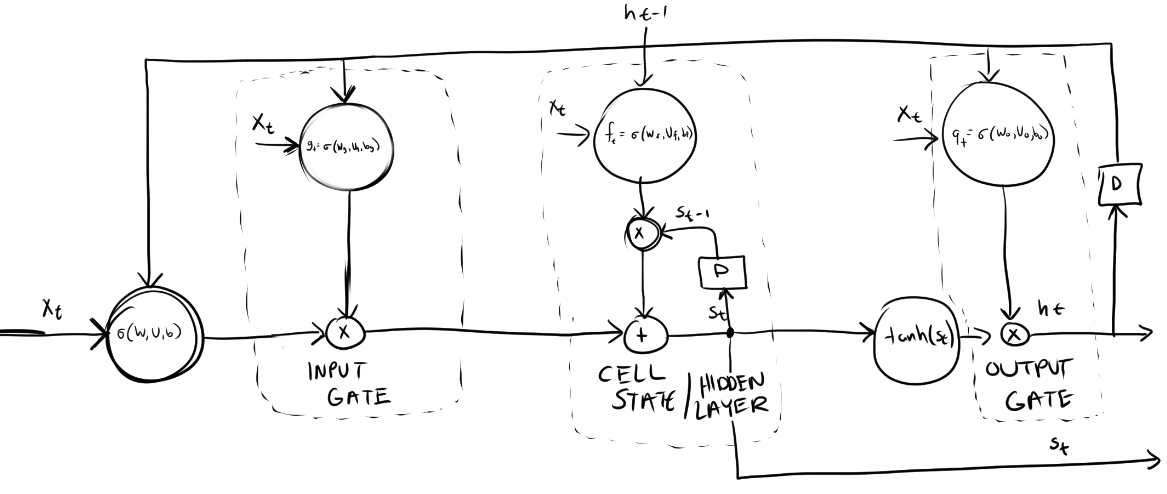


# RNN Implementation

In [ ]:
#RNN appraoch
# TensorFlow and tf.keras
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import LSTM
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


batch_size = 32
num_classes = 10

# Embedding dimensions for hidden layer
row_hidden = 128
col_hidden = 128

# split data
(train_x, y_train), (x_test, y_test) = fashion_mnist.load_data()

train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
train_x = train_x.astype('float32')
x_test = x_test.astype('float32')
train_x /= 255
x_test /= 255

# Converts class vectors to binary
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

row, col, pixel = train_x.shape[1:]

x = Input(shape=(row, col, pixel))
# encoding rows and columns with LSTM
encoded_rows = TimeDistributed(LSTM(row_hidden))(x)
encoded_columns = LSTM(col_hidden)(encoded_rows)

# Predictions/Model
prediction = Dense(num_classes, activation='softmax')(encoded_columns) #for output gate
model = Model(x, prediction)

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [ ]:
# Training.
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluation.
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - ETA: 0s - loss: 0.7156 - acc: 0.7369

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 716s 12ms/sample - loss: 0.7156 - acc: 0.7369 - val_loss: 0.5065 - val_acc: 0.8132
Epoch 2/5
60000/60000 [==============================] - 719s 12ms/sample - loss: 0.4325 - acc: 0.8406 - val_loss: 0.4028 - val_acc: 0.8491
Epoch 3/5
60000/60000 [==============================] - 717s 12ms/sample - loss: 0.3682 - acc: 0.8639 - val_loss: 0.3709 - val_acc: 0.8631
Epoch 4/5
60000/60000 [==============================] - 717s 12ms/sample - loss: 0.3325 - acc: 0.8756 - val_loss: 0.3360 - val_acc: 0.8749
Epoch 5/5
60000/60000 [==============================] - 720s 12ms/sample - loss: 0.3083 - acc: 0.8848 - val_loss: 0.3439 - val_acc: 0.8737
Test loss: 0.34392214896678924
Test accuracy: 0.8737


In [ ]:
print('\nTest accuracy:'+ str(scores[1]*100)+'%')


Test accuracy:87.37000226974487%


In [ ]:
#CNN equivalent using same framework
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:'+ str(test_acc*100)+'%')

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 3.0697 - accuracy: 0.6930
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6628 - accuracy: 0.7448
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5886 - accuracy: 0.7814
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5597 - accuracy: 0.7964
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5558 - accuracy: 0.8049
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5290 - accuracy: 0.8147
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5202 - accuracy: 0.8196
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5058 - accuracy: 0.8254
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5033 - accuracy: 0.8282
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.491

(28, 28)
(1, 28, 28)
[[2.5351751e-03 6.4470864e-09 9.0911579e-01 2.9746565e-04 3.1984858e-02
  5.1181454e-19 5.6043595e-02 0.0000000e+00 2.3110586e-05 1.5626759e-24]]


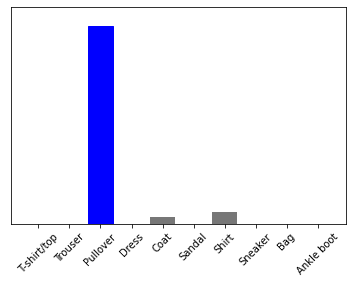

2

In [ ]:
#Making predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
np.argmax(predictions[0])

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#Using trained model
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = probability_model.predict(img)
print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
np.argmax(predictions_single[0])

# Performance Comparison

To be clear, CNNs are used to solve problems to spatial data like images, which makes it perfect for this dataset. On the other hand, LSTM is more suitable for predicting. The performance for both are similar in terms of accuracy and time. This logic applies only if they are being trained on the same number of input samples though. Note that LSTM requires more parameters than CNN. Even if LSTM is slower to train, it's ability to look at long sequences of inputs without changing the size of the network brings many benefits. 


# Summary of CNN + RNN

Combining RNN and CNN can make the classification task of labeling images much more easier. This is because you'll be taking CNN's strength of identifying images, and LSTM's strength to embed labels. In the paper, their experiermntal results on several datasets show that the two combined do bring a superior performance. For example, the attention visualization in the paper shows that the combined model can focus on different areas of the image when predicting different labels. The only drawback is that this model has trouble predicting small objects because of the lack of global visual features. 